# AI/LLM for Devs, Week 1 Experiment notebook

This notebook captures a series of experiments to understand and explore working with neural networks.

The initial starting demo was fine-tuning the resnet18 model to recognize bird images, [notebook here](https://colab.research.google.com/drive/11mfy0oWj9IUgZuU3fhcOxV5iwfVEeonK#scrollTo=49pQQPyn4TbA).

## Background

Before warming up to the experiments, confirm your high level understanding of neural networks by answering the following questions below. Write your answers in this notebook.

1. What is the difference between classification and regression?
2. Describe how a feedforward model architecture works, using terms like neurons, input/hidden/output layers, weight/biases, and activation functions.
3. Besides feedforward architectures, what are the other common architectures, and when are they used?
4. Describe how the training loop works using terms like weights, backpropagation (using stochastic gradient descent), loss functions, batches, and epochs.
5. How is fine tuning different from training?
6. What is overfitting, and what are various causes of it?
7. What is the difference between parameters and hyperparameters?
8. What are the most important hyperparameters?

If you have a firm grasp of the concepts above, it covers most of the basics that you'll need later.


## Setup

It's common to store training files in your Google Drive. In order to run the setup code below, you need to copy the training images into a folder called `bird_or_not` in your Google Drive. Download the files [here](https://drive.google.com/drive/folders/1uvs9iDljZHSiP0WuGyAP9j962n8N50Mz?usp=drive_link), then run the cells below.

In [2]:
from google.colab import drive
from pathlib import Path

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Setup

!pip install fastai
!pip install fastbook

from fastbook import *
from fastai.vision.widgets import *

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 94.1MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.558958,0.114725,0.043478,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.257239,0.041723,0.021739,00:24
1,0.144654,0.021699,0.000000,00:26
2,0.097485,0.014606,0.000000,00:24


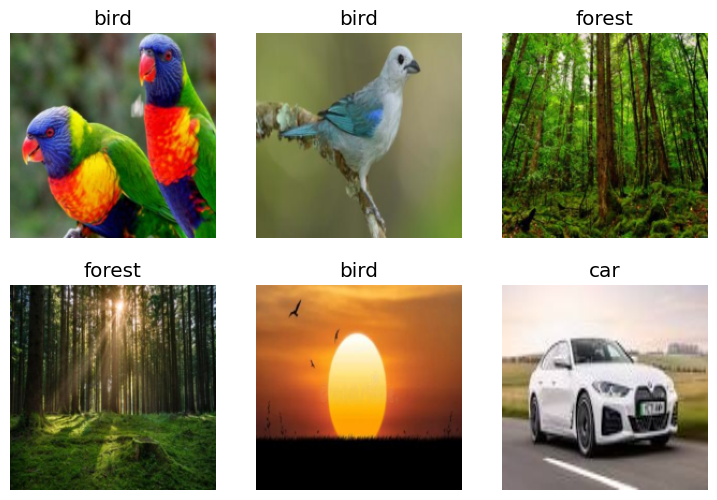

In [4]:
path = Path('/content/drive/My Drive/codepath/week1/bird_or_not')

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

## Experiment #1 - Add an additional class

The initial project has just two classes: birds and forests. Add a third class (e.g., cats or anything else you want), and manually test the classifier by passing in a few selected images of cats, birds, or forests.

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,error_rate,time
0,1.334037,0.150616,0.043478,01:32


epoch,train_loss,valid_loss,error_rate,time
0,0.173312,0.054634,0.021739,01:58
1,0.116775,0.056849,0.021739,01:58
2,0.087219,0.047610,0.021739,01:59


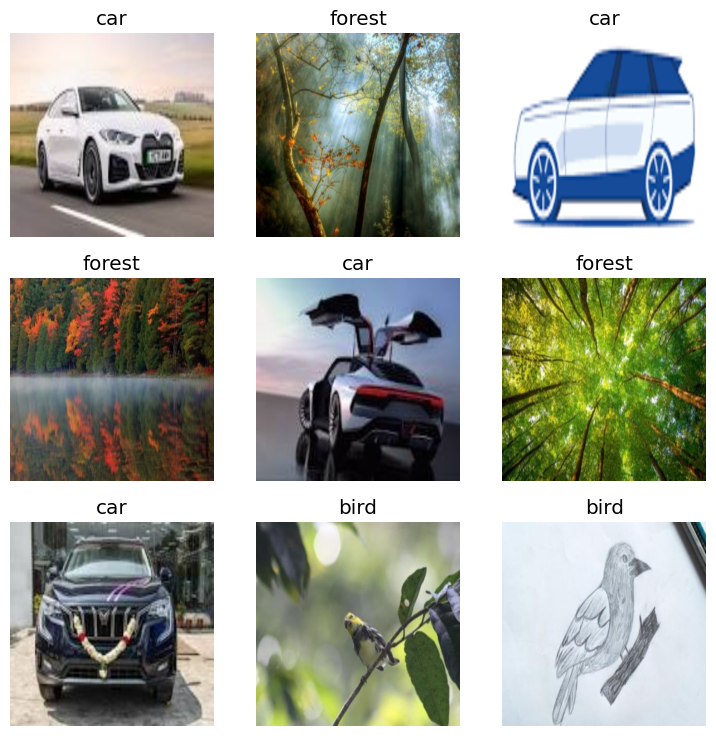

In [11]:
path = Path('/content/drive/My Drive/codepath/week1/bird_or_not')

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(400, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=9)

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

This is a: car.
Probability it's a car: 0.0015


This is a: bird.
Probability it's a bird: 0.9896


This is a: forest.
Probability it's a forest: 0.0006


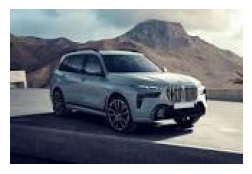

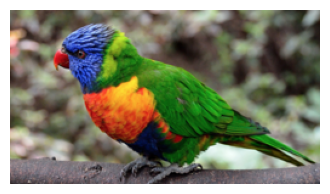

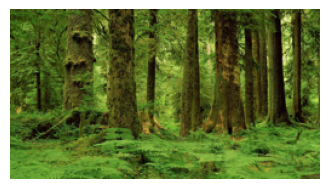

In [9]:
# Verify

car = PILImage.create('/content/drive/My Drive/codepath/week1/car.jpg')
bird = PILImage.create('/content/drive/My Drive/codepath/week1/bird.jpg')
forest = PILImage.create('/content/drive/My Drive/codepath/week1/forest.jpg')
car.thumbnail((256,256))
car.show()
bird.thumbnail((256,256))
bird.show()
forest.thumbnail((256,256))
forest.show()

is_car, _, probs = learn.predict(car)
print(f"This is a: {is_car}.")
print(f"Probability it's a car: {probs[0]:.4f}")

is_bird, _, probs1 = learn.predict(bird)
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs1[0]:.4f}")

is_forest, _, probs2 = learn.predict(forest)
print(f"This is a: {is_forest}.")
print(f"Probability it's a forest: {probs2[0]:.4f}")


## Experiment #2 - Use original resnet model

In order to understand what fine-tuning is actually doing, let's take a step back and use the original model.

The original resnet model is trained on millions of images from ImageNet, which it then buckets into 1,000 categories. The full set of categories is over 20k, but resnet only uses a subset for research purposes. Note: this means that the resnet18 model has an output layer that has 1,000 neurons (one for each category).

Look at the demo code below, which uses Pytorch. Experiment with passing in different images, and see which category resnet18 picks. Note: it doesn't pick a single category -- instead, it assigns a probability for each category.



seashore: 0.7161
promontory: 0.0443
warplane: 0.0210
lakeside: 0.0179
space_shuttle: 0.0172


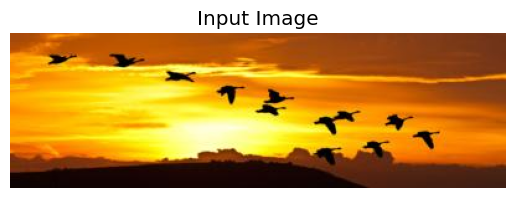

jacamar: 0.4681
lorikeet: 0.4192
robin: 0.0492
brambling: 0.0157
bee_eater: 0.0078


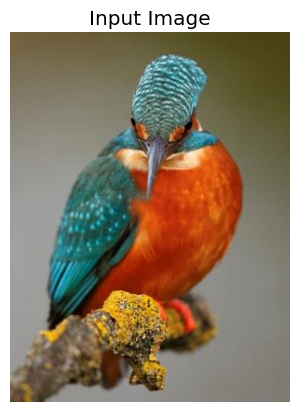

bald_eagle: 0.3404
pelican: 0.2415
sea_lion: 0.0548
kite: 0.0456
vulture: 0.0381


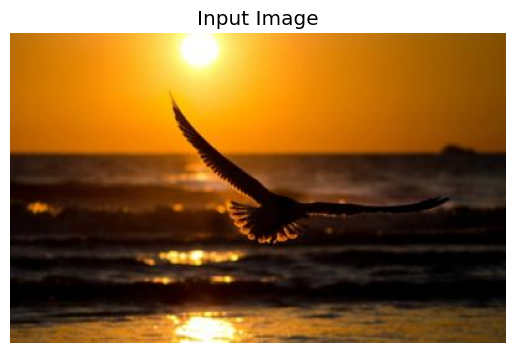

worm_fence: 0.1664
lakeside: 0.1421
valley: 0.0854
viaduct: 0.0830
barn: 0.0548


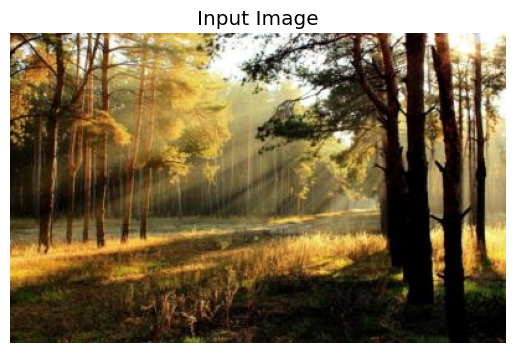

valley: 0.7839
lakeside: 0.0154
coral_reef: 0.0112
hen-of-the-woods: 0.0098
grey_fox: 0.0097


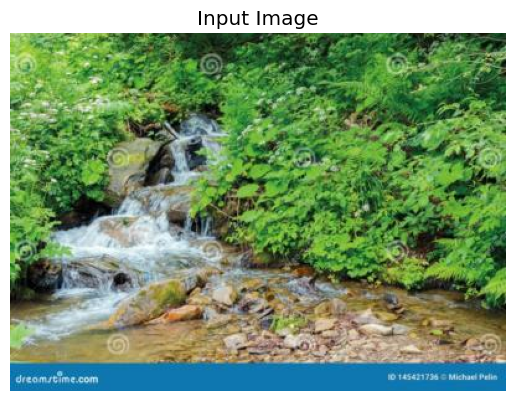

sloth_bear: 0.0542
American_black_bear: 0.0480
monastery: 0.0463
guillotine: 0.0395
lumbermill: 0.0332


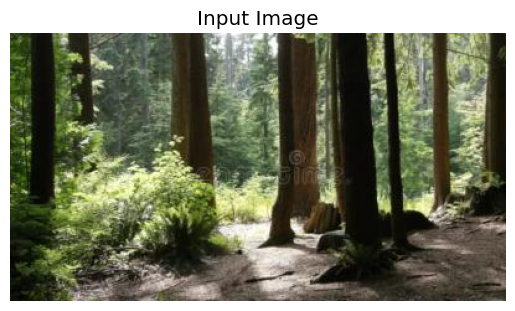

sports_car: 0.3941
pickup: 0.1290
crash_helmet: 0.1088
car_wheel: 0.0872
convertible: 0.0484


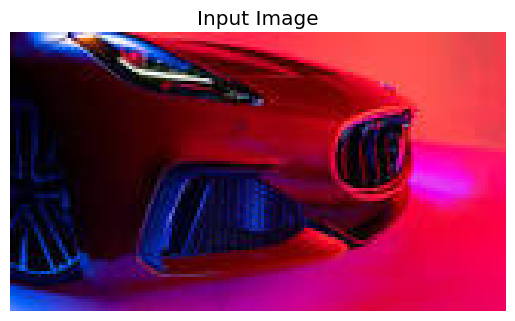

sports_car: 0.7451
racer: 0.0842
convertible: 0.0654
trailer_truck: 0.0232
pickup: 0.0140


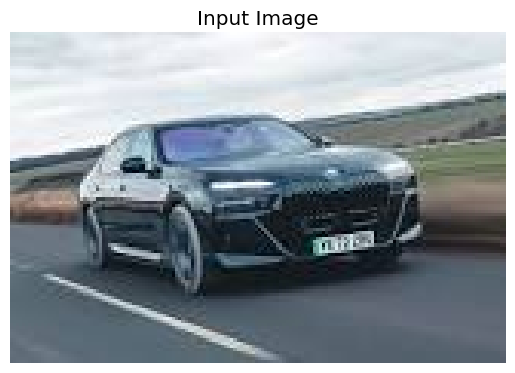

moving_van: 0.2725
minivan: 0.1324
sports_car: 0.1181
limousine: 0.0680
pickup: 0.0639


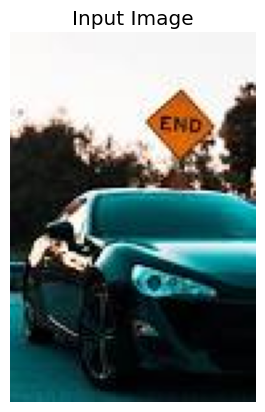

In [16]:
# Experiment #2 code

import torch
from torchvision import models, transforms
from PIL import Image
import requests
import json
import matplotlib.pyplot as plt

# Load the pre-trained ResNet18 model
model = models.resnet18(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Function to load an image and apply transformations
def process_image(image_path):
    img = Image.open(image_path).convert('RGB')
    img_t = transform(img)
    batch_t = torch.unsqueeze(img_t, 0)
    return batch_t, img  # Return both the tensor and the original image

# Function to get predictions and print human-readable labels
def get_predictions(image_path, class_index_dict):
    tensor, original_img = process_image(image_path)
    with torch.no_grad():
        out = model(tensor)
    probabilities = torch.nn.functional.softmax(out, dim=1)
    top5_prob, top5_catid = torch.topk(probabilities, 5)

    # Print the top 5 human-readable labels with their probabilities
    for i in range(top5_prob.size(1)):
        class_id = str(top5_catid[0][i].item())
        class_name = class_index_dict[class_id][1]  # Access the human-readable class name
        print(f"{class_name}: {top5_prob[0][i].item():.4f}")

    # Visualize the image
    plt.imshow(original_img)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.title("Input Image")
    plt.show()

# Download and load the ImageNet class index JSON
url = 'https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json'
response = requests.get(url)
response.raise_for_status()
imagenet_classes = json.loads(response.text)

# Example usage
image_path = get_image_files(path/'bird')[1]
get_predictions(image_path, imagenet_classes)

image_path = get_image_files(path/'bird')[10]
get_predictions(image_path, imagenet_classes)

image_path = get_image_files(path/'bird')[30]
get_predictions(image_path, imagenet_classes)

image_path = get_image_files(path/'forest')[10]
get_predictions(image_path, imagenet_classes)

image_path = get_image_files(path/'forest')[18]
get_predictions(image_path, imagenet_classes)

image_path = get_image_files(path/'forest')[37]
get_predictions(image_path, imagenet_classes)

image_path = get_image_files(path/'car')[6]
get_predictions(image_path, imagenet_classes)

image_path = get_image_files(path/'car')[19]
get_predictions(image_path, imagenet_classes)

image_path = get_image_files(path/'car')[44]
get_predictions(image_path, imagenet_classes)


## Experiment #3 - Benchmark accuracy before/after fine-tuning

fast.ai provides a way to run the entire validation set through the model, and you can print the error rate.

Look at the bird classification error before and after fine-tuning. The original resnet18 model had an output layer with 1000 neurons (one for each image category). When we are fine-tuning, we are removing the output layer, and adding a new output layer that only has 2 neurons.

What is the error rate before and after fine-tuning? Why is the error rate so high initially?

In [ ]:
# Experiment #3 code


## Experiment #4 - Visualize model internals

Image-based models like resnet18 are based on convolution. It is common and sometimes interesting to visualize the various layers. Sometimes, because sometimes it gives people intuition for what's happening inside the model. Sometimes not, because another fact about deep learning is that its ways are mysterious, and we're not sure why models work so well.

Visualize a selection of the layers, especially the layers close to the beginning and close to the end.

In [ ]:
# Experiment #4 code


## Experiment #5 - Decrease training set size

Decrease the training set size, and plot error rates as a function of number of training images.

Create a large test set (different from your training and validation set). How does the model accuracy for the test set change based on different training set sizes?

In [ ]:
# Experiment #5 code


## Experiment #6 - Choose your own experiment

Next week (Week 2), we will do lightning presentations of different experiments. Go back to one of the previous experiments and further expand it, or explore one of the optional experiments below, or investigate an entirely different thing.

Presentations will be between 1-5 minutes (depending on the complexity of your experiment).

The goal is to continue to build our practical intuition, and to leverage the learnings that we'll get hearing what everyone else explored, and what they found out!

In [ ]:
# Experiment #6 code


## Experiment #7 (optional) - Increase number of epochs

Increase the number of epochs.

Create a large test set, can be the same as the prior experiment (different from your training and validation set). How does the model accuracy for the test set change based on different epochs? At what point do you see overfitting?

Decrease the training set size, does that make overfitting happen earlier?

In [ ]:
# Experiment #7 code


## Experiment #8 (optional) - Introduce bad training data

We'll find in this class that quality of training data is one of the biggest factors of model performance, and should be a big focus.

Explore the impact of mislabeling training images, and see when it starts to impact model accuracy.

In [ ]:
# Experiment #8 code


## Experiment #9 - (optional) Classify out-of-distribution images

Try passing in an image of a person, how does your fine-tuned model classify that image?

Try different techniques to better handle out-of-distribution images.

In [ ]:
# Experiment #9 code


## Experiment #10 - (optional) Compare different architectures

Try working with resnet34. How does this larger model perform with the different training set sizes?

In [ ]:
# Experiment #10 code
